In [1]:
import os
import pandas as pd
path = r"C:\Users\Wong\Desktop\Dissertation\Imputed_dataset"

Haltwhistle_water = pd.read_csv(os.path.join(path, 'Haltwhistle_water.csv'))
Haltwhistle_rainfall = pd.read_csv(os.path.join(path, 'Haltwhistle_rainfall.csv'))

In [2]:
Haltwhistle_water['dateTime'] = pd.to_datetime(Haltwhistle_water['dateTime'])
Haltwhistle_rainfall['dateTime'] = pd.to_datetime(Haltwhistle_rainfall['dateTime'])

In [3]:
Haltwhistle_water.set_index('dateTime', inplace=True)
Haltwhistle_rainfall.set_index('dateTime', inplace=True)

In [4]:
start_date = pd.to_datetime('13/11/2020 00:00:00', format='%d/%m/%Y %H:%M:%S')
end_date = pd.to_datetime('3/2/2024 00:00:00', format='%d/%m/%Y %H:%M:%S')
Haltwhistle_water_subset = Haltwhistle_water.loc[(Haltwhistle_water.index >= start_date) & (Haltwhistle_water.index <= end_date)]
Haltwhistle_rainfall_subset = Haltwhistle_rainfall.loc[(Haltwhistle_rainfall.index >= start_date) & (Haltwhistle_rainfall.index <= end_date)]

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras import Model
from keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [6]:
merged_data = pd.merge(Haltwhistle_rainfall_subset, Haltwhistle_water_subset, on='dateTime', how='inner')

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
merged_data = scaler.fit_transform(merged_data)

In [8]:
train_data = merged_data[:90394]
test_data = merged_data[90394:]

In [9]:
window_size = 96
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

In [11]:
Ridge_Halt_96in_48out = Ridge()
cv_scores_Halt_96in_48out_Ridge = cross_val_score(Ridge_Halt_96in_48out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [12]:
cv_scores_Halt_96in_48out_Ridge = -cv_scores_Halt_96in_48out_Ridge
print("Cross-validation scores:")
print(cv_scores_Halt_96in_48out_Ridge)
print("Mean MSE:", cv_scores_Halt_96in_48out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Halt_96in_48out_Ridge.std())

Cross-validation scores:
[0.00238535 0.00596529 0.00091804 0.00495433 0.00247687]
Mean MSE: 0.0033399765257154253
Standard Deviation MSE: 0.0018450178649656987


In [13]:
window_size = 48
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [14]:
Ridge_Halt_48in_48out = Ridge()
cv_scores_Halt_48in_48out_Ridge = cross_val_score(Ridge_Halt_48in_48out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_Halt_48in_48out_Ridge = -cv_scores_Halt_48in_48out_Ridge
print("Cross-validation scores:")
print(cv_scores_Halt_48in_48out_Ridge)
print("Mean MSE:", cv_scores_Halt_48in_48out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Halt_48in_48out_Ridge.std())

Cross-validation scores:
[0.00244669 0.00601436 0.00097948 0.0052031  0.00247247]
Mean MSE: 0.003423223093469578
Standard Deviation MSE: 0.001882092503055944


In [15]:
window_size = 24
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [16]:
Ridge_Halt_24in_48out = Ridge()
cv_scores_Halt_24in_48out_Ridge = cross_val_score(Ridge_Halt_24in_48out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_Halt_24in_48out_Ridge = -cv_scores_Halt_24in_48out_Ridge
print("Cross-validation scores:")
print(cv_scores_Halt_24in_48out_Ridge)
print("Mean MSE:", cv_scores_Halt_24in_48out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Halt_24in_48out_Ridge.std())

Cross-validation scores:
[0.00246679 0.00605248 0.00098734 0.00531686 0.002516  ]
Mean MSE: 0.0034678962684979698
Standard Deviation MSE: 0.001905793677956285


In [17]:
window_size = 96
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [18]:
Ridge_Halt_96in_32out = Ridge()
cv_scores_Halt_96in_32out_Ridge = cross_val_score(Ridge_Halt_96in_32out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_Halt_96in_32out_Ridge = -cv_scores_Halt_96in_32out_Ridge
print("Cross-validation scores:")
print(cv_scores_Halt_96in_32out_Ridge)
print("Mean MSE:", cv_scores_Halt_96in_32out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Halt_96in_32out_Ridge.std())

Cross-validation scores:
[0.00164239 0.00405539 0.0006459  0.00317338 0.00163376]
Mean MSE: 0.002230163246492775
Standard Deviation MSE: 0.0012191952048397825


In [19]:
window_size = 48
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [20]:
Ridge_Halt_48in_32out = Ridge()
cv_scores_Halt_48in_32out_Ridge = cross_val_score(Ridge_Halt_48in_32out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_Halt_48in_32out_Ridge = -cv_scores_Halt_48in_32out_Ridge
print("Cross-validation scores:")
print(cv_scores_Halt_48in_32out_Ridge)
print("Mean MSE:", cv_scores_Halt_48in_32out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Halt_48in_32out_Ridge.std())

Cross-validation scores:
[0.00160486 0.00406591 0.00067654 0.00329519 0.00165128]
Mean MSE: 0.002258756245897069
Standard Deviation MSE: 0.0012361248216061196


In [21]:
window_size = 24
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [22]:
Ridge_Halt_24in_32out = Ridge()
cv_scores_Halt_24in_32out_Ridge = cross_val_score(Ridge_Halt_24in_32out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_Halt_24in_32out_Ridge = -cv_scores_Halt_24in_32out_Ridge
print("Cross-validation scores:")
print(cv_scores_Halt_24in_32out_Ridge)
print("Mean MSE:", cv_scores_Halt_24in_32out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Halt_24in_32out_Ridge.std())

Cross-validation scores:
[0.00161822 0.00410019 0.00067429 0.00336332 0.00167964]
Mean MSE: 0.00228713125979642
Standard Deviation MSE: 0.0012540434293233892


In [23]:
window_size = 96
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [24]:
Ridge_Halt_96in_16out = Ridge()
cv_scores_Halt_96in_16out_Ridge = cross_val_score(Ridge_Halt_96in_16out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_Halt_96in_16out_Ridge = -cv_scores_Halt_96in_16out_Ridge
print("Cross-validation scores:")
print(cv_scores_Halt_96in_16out_Ridge)
print("Mean MSE:", cv_scores_Halt_96in_16out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Halt_96in_16out_Ridge.std())

Cross-validation scores:
[0.00063119 0.00170322 0.00029816 0.00146896 0.00065948]
Mean MSE: 0.0009522011830718779
Standard Deviation MSE: 0.000538066003627676


In [25]:
window_size = 48
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [26]:
Ridge_Halt_48in_16out = Ridge()
cv_scores_Halt_48in_16out_Ridge = cross_val_score(Ridge_Halt_48in_16out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_Halt_48in_16out_Ridge = -cv_scores_Halt_48in_16out_Ridge
print("Cross-validation scores:")
print(cv_scores_Halt_48in_16out_Ridge)
print("Mean MSE:", cv_scores_Halt_48in_16out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Halt_48in_16out_Ridge.std())

Cross-validation scores:
[0.00061809 0.00170402 0.00030421 0.00150607 0.00066759]
Mean MSE: 0.0009599937641510353
Standard Deviation MSE: 0.0005448352721782071


In [27]:
window_size = 24
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [28]:
Ridge_Halt_24in_16out = Ridge()
cv_scores_Halt_24in_16out_Ridge = cross_val_score(Ridge_Halt_24in_16out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_Halt_24in_16out_Ridge = -cv_scores_Halt_24in_16out_Ridge
print("Cross-validation scores:")
print(cv_scores_Halt_24in_16out_Ridge)
print("Mean MSE:", cv_scores_Halt_24in_16out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Halt_24in_16out_Ridge.std())

Cross-validation scores:
[0.00062061 0.00170032 0.00029892 0.00152494 0.00067801]
Mean MSE: 0.0009645618724279905
Standard Deviation MSE: 0.000547512806238851


In [29]:
window_size = 96
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [30]:
Ridge_Halt_96in_8out = Ridge()
cv_scores_Halt_96in_8out_Ridge = cross_val_score(Ridge_Halt_96in_8out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_Halt_96in_8out_Ridge = -cv_scores_Halt_96in_8out_Ridge
print("Cross-validation scores:")
print(cv_scores_Halt_96in_8out_Ridge)
print("Mean MSE:", cv_scores_Halt_96in_8out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Halt_96in_8out_Ridge.std())

Cross-validation scores:
[1.96440380e-04 5.96342176e-04 9.60008008e-05 6.81175896e-04
 2.43160159e-04]
Mean MSE: 0.00036262388232277383
Standard Deviation MSE: 0.00023198104723446306


In [31]:
window_size = 48
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [32]:
Ridge_Halt_48in_8out = Ridge()
cv_scores_Halt_48in_8out_Ridge = cross_val_score(Ridge_Halt_48in_8out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_Halt_48in_8out_Ridge = -cv_scores_Halt_48in_8out_Ridge
print("Cross-validation scores:")
print(cv_scores_Halt_48in_8out_Ridge)
print("Mean MSE:", cv_scores_Halt_48in_8out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Halt_48in_8out_Ridge.std())

Cross-validation scores:
[1.93212443e-04 5.96315084e-04 9.68108342e-05 6.88274707e-04
 2.45235390e-04]
Mean MSE: 0.0003639696916142083
Standard Deviation MSE: 0.00023400335557372903


In [33]:
window_size = 24
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [34]:
Ridge_Halt_24in_8out = Ridge()
cv_scores_Halt_24in_8out_Ridge = cross_val_score(Ridge_Halt_24in_8out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_Halt_24in_8out_Ridge = -cv_scores_Halt_24in_8out_Ridge
print("Cross-validation scores:")
print(cv_scores_Halt_24in_8out_Ridge)
print("Mean MSE:", cv_scores_Halt_24in_8out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Halt_24in_8out_Ridge.std())

Cross-validation scores:
[1.94252616e-04 5.92620614e-04 9.52009135e-05 6.91584513e-04
 2.47307046e-04]
Mean MSE: 0.0003641931404510879
Standard Deviation MSE: 0.00023420639639007675


In [ ]:
cv_scores_Halt_96in_48out_Ridge

In [35]:
window_size = 96
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [36]:
Ridge_Halt_96in_48out = Ridge()
Ridge_Halt_96in_48out.fit(X_train, y_train)

Ridge()

In [37]:
pred_Ridge_Halt_96in_48out = Ridge_Halt_96in_48out.predict(X_test)

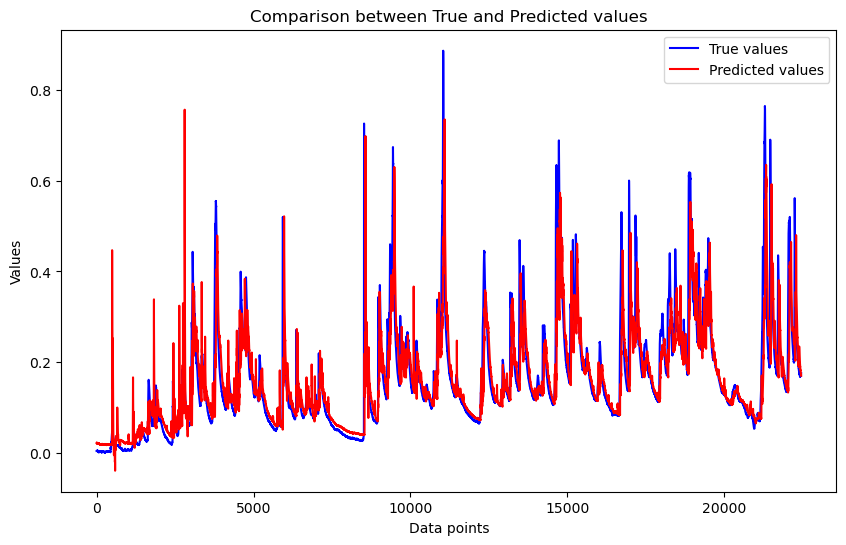

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_Ridge_Halt_96in_48out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [39]:
def nse(y_test, pred_Ridge_Halt_96in_48out):
    numerator = np.sum((y_test - pred_Ridge_Halt_96in_48out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_Ridge_Halt_96in_48out)
mae = mean_absolute_error(y_test, pred_Ridge_Halt_96in_48out)
nse_value = nse(y_test, pred_Ridge_Halt_96in_48out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.005688942663750272
MAE: 0.04139763318682206
NSE: 0.6102669652729862


In [40]:
ridge_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
grid_Ridge_Halt_96in_48out_1 = Ridge()

In [41]:
from sklearn.model_selection import GridSearchCV
grid_Ridge_Halt_96in_48out = GridSearchCV(grid_Ridge_Halt_96in_48out_1, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_Ridge_Halt_96in_48out.fit(X_train, y_train)

Ridge()

In [42]:
best_ridge_params = grid_Ridge_Halt_96in_48out.best_params_
print("Best Ridge Parameters:", best_ridge_params)

Best Ridge Parameters: {'alpha': 0.1}


In [43]:
tuned_Ridge_Halt_96in_48out = Ridge(alpha=0.1)

In [44]:
tuned_Ridge_Halt_96in_48out.fit(X_train, y_train)

Ridge(alpha=0.1)

In [45]:
pred_tuned_Ridge_Halt_96in_48out = tuned_Ridge_Halt_96in_48out.predict(X_test)

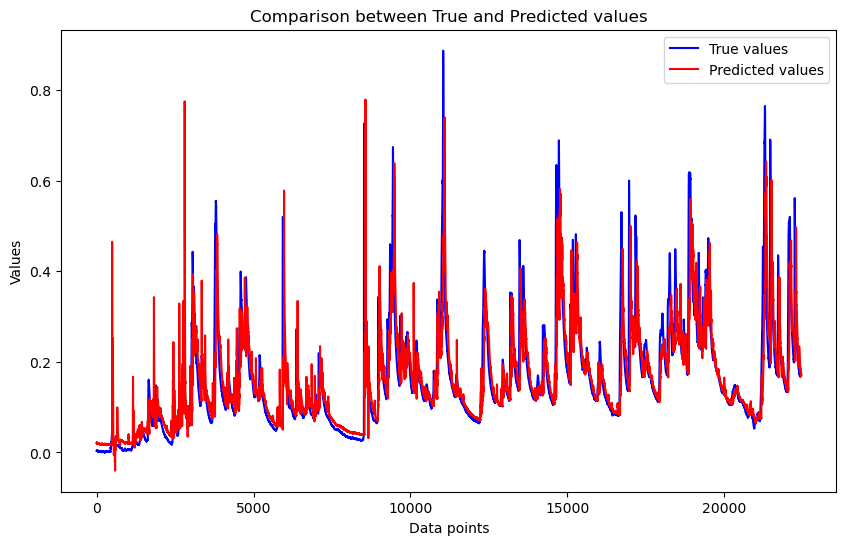

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_tuned_Ridge_Halt_96in_48out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [47]:
def nse(y_test, pred_tuned_Ridge_Halt_96in_48out):
    numerator = np.sum((y_test - pred_tuned_Ridge_Halt_96in_48out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_tuned_Ridge_Halt_96in_48out)
mae = mean_absolute_error(y_test, pred_tuned_Ridge_Halt_96in_48out)
nse_value = nse(y_test, pred_tuned_Ridge_Halt_96in_48out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.005676988512911787
MAE: 0.041288237652249364
NSE: 0.6110859096285963


In [ ]:
cv_scores_Halt_96in_32out_Ridge

In [48]:
window_size = 96
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [49]:
Ridge_Halt_96in_32out = Ridge()
Ridge_Halt_96in_32out.fit(X_train, y_train)

Ridge()

In [50]:
pred_Ridge_Halt_96in_32out = Ridge_Halt_96in_32out.predict(X_test)

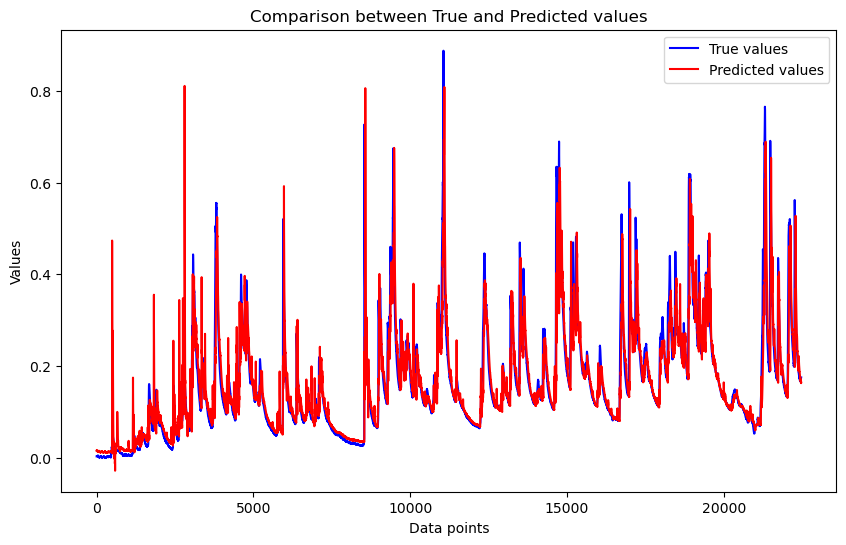

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_Ridge_Halt_96in_32out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [52]:
def nse(y_test, pred_Ridge_Halt_96in_32out):
    numerator = np.sum((y_test - pred_Ridge_Halt_96in_32out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_Ridge_Halt_96in_32out)
mae = mean_absolute_error(y_test, pred_Ridge_Halt_96in_32out)
nse_value = nse(y_test, pred_Ridge_Halt_96in_32out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.003444113538967033
MAE: 0.0298166797675727
NSE: 0.7641917184448843


In [61]:
grid_Ridge_Halt_96in_32out_1 = Ridge()
grid_Ridge_Halt_96in_32out = GridSearchCV(grid_Ridge_Halt_96in_32out_1, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_Ridge_Halt_96in_32out.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [62]:
best_ridge_params = grid_Ridge_Halt_96in_32out.best_params_
print("Best Ridge Parameters:", best_ridge_params)

Best Ridge Parameters: {'alpha': 0.1}


In [63]:
tuned_Ridge_Halt_96in_32out = Ridge(alpha=0.1)

In [64]:
tuned_Ridge_Halt_96in_32out.fit(X_train, y_train)

Ridge(alpha=0.1)

In [65]:
pred_tuned_ridge_Halt_96in_32out = tuned_Ridge_Halt_96in_32out.predict(X_test)

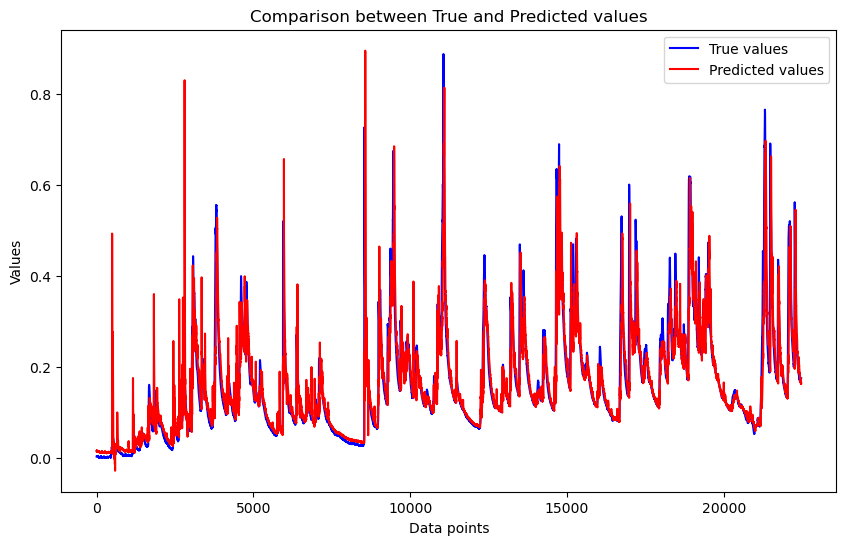

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_tuned_ridge_Halt_96in_32out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [67]:
def nse(y_test, pred_tuned_ridge_Halt_96in_32out):
    numerator = np.sum((y_test - pred_tuned_ridge_Halt_96in_32out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_tuned_ridge_Halt_96in_32out)
mae = mean_absolute_error(y_test, pred_tuned_ridge_Halt_96in_32out)
nse_value = nse(y_test, pred_tuned_ridge_Halt_96in_32out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.0034316185459765257
MAE: 0.029639064374297794
NSE: 0.7650472137100081


In [ ]:
cv_scores_Halt_96in_16out_Ridge

In [68]:
window_size = 96
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [69]:
Ridge_Halt_96in_16out = Ridge()
Ridge_Halt_96in_16out.fit(X_train, y_train)

Ridge()

In [70]:
pred_Ridge_Halt_96in_16out = Ridge_Halt_96in_16out.predict(X_test)

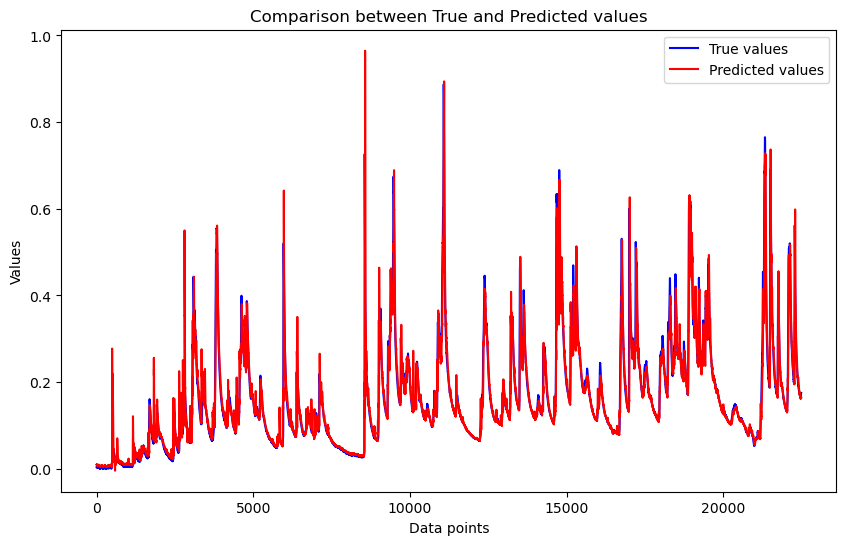

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_Ridge_Halt_96in_16out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [72]:
def nse(y_test, pred_Ridge_Halt_96in_16out):
    numerator = np.sum((y_test - pred_Ridge_Halt_96in_16out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_Ridge_Halt_96in_16out)
mae = mean_absolute_error(y_test, pred_Ridge_Halt_96in_16out)
nse_value = nse(y_test, pred_Ridge_Halt_96in_16out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.0013745688237730448
MAE: 0.01639513315505379
NSE: 0.9059417657880641


In [73]:
grid_Ridge_Halt_96in_16out_1 = Ridge()
grid_Ridge_Halt_96in_16out = GridSearchCV(grid_Ridge_Halt_96in_16out_1, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_Ridge_Halt_96in_16out.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [74]:
best_ridge_params = grid_Ridge_Halt_96in_16out.best_params_
print("Best Ridge Parameters:", best_ridge_params)

Best Ridge Parameters: {'alpha': 0.1}


In [75]:
tuned_Ridge_Halt_96in_16out = Ridge(alpha=0.1)
tuned_Ridge_Halt_96in_16out.fit(X_train, y_train)

Ridge(alpha=0.1)

In [76]:
pred_tuned_ridge_Halt_96in_16out = tuned_Ridge_Halt_96in_16out.predict(X_test)

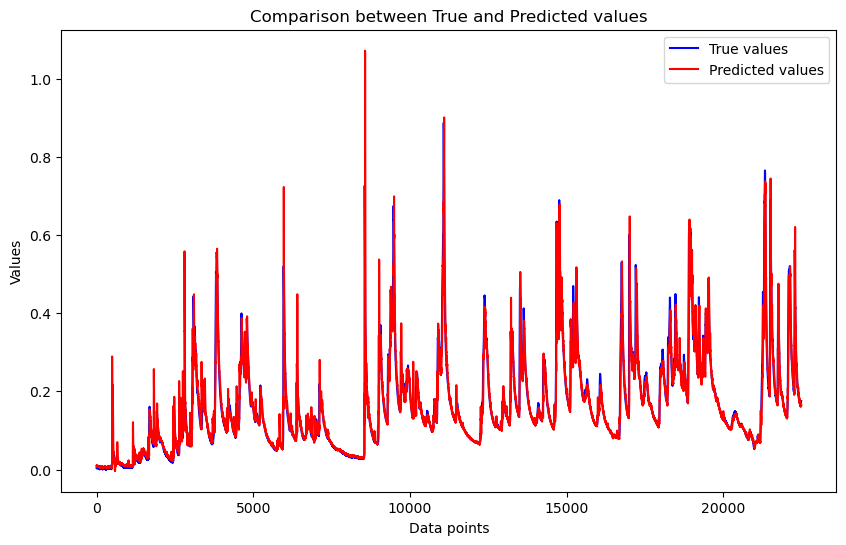

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_tuned_ridge_Halt_96in_16out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [78]:
def nse(y_test, pred_tuned_ridge_Halt_96in_16out):
    numerator = np.sum((y_test - pred_tuned_ridge_Halt_96in_16out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_tuned_ridge_Halt_96in_16out)
mae = mean_absolute_error(y_test, pred_tuned_ridge_Halt_96in_16out)
nse_value = nse(y_test, pred_tuned_ridge_Halt_96in_16out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.0013576813152044887
MAE: 0.016095719454949583
NSE: 0.9070973348717839


In [ ]:
cv_scores_Halt_96in_8out_Ridge

In [79]:
window_size = 96
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [80]:
Ridge_Halt_96in_8out = Ridge()
Ridge_Halt_96in_8out.fit(X_train, y_train)

Ridge()

In [81]:
pred_Ridge_Halt_96in_8out = Ridge_Halt_96in_8out.predict(X_test)

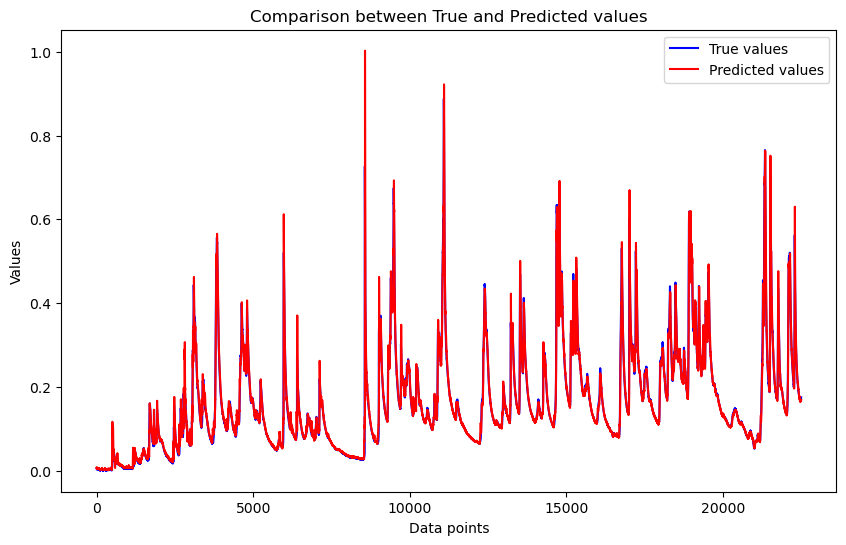

In [82]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_Ridge_Halt_96in_8out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [83]:
def nse(y_test, pred_Ridge_Halt_96in_8out):
    numerator = np.sum((y_test - pred_Ridge_Halt_96in_8out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_Ridge_Halt_96in_8out)
mae = mean_absolute_error(y_test, pred_Ridge_Halt_96in_8out)
nse_value = nse(y_test, pred_Ridge_Halt_96in_8out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.0005235630203536649
MAE: 0.008308286462272886
NSE: 0.9641839747431024


In [84]:
grid_Ridge_Halt_96in_8out_1 = Ridge()
grid_Ridge_Halt_96in_8out = GridSearchCV(grid_Ridge_Halt_96in_8out_1, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_Ridge_Halt_96in_8out.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [85]:
best_ridge_params = grid_Ridge_Halt_96in_8out.best_params_
print("Best Ridge Parameters:", best_ridge_params)

Best Ridge Parameters: {'alpha': 0.1}


In [86]:
tuned_Ridge_Halt_96in_8out = Ridge(alpha=0.1)
tuned_Ridge_Halt_96in_8out.fit(X_train, y_train)

Ridge(alpha=0.1)

In [87]:
pred_tuned_ridge_Halt_96in_8out = tuned_Ridge_Halt_96in_8out.predict(X_test)

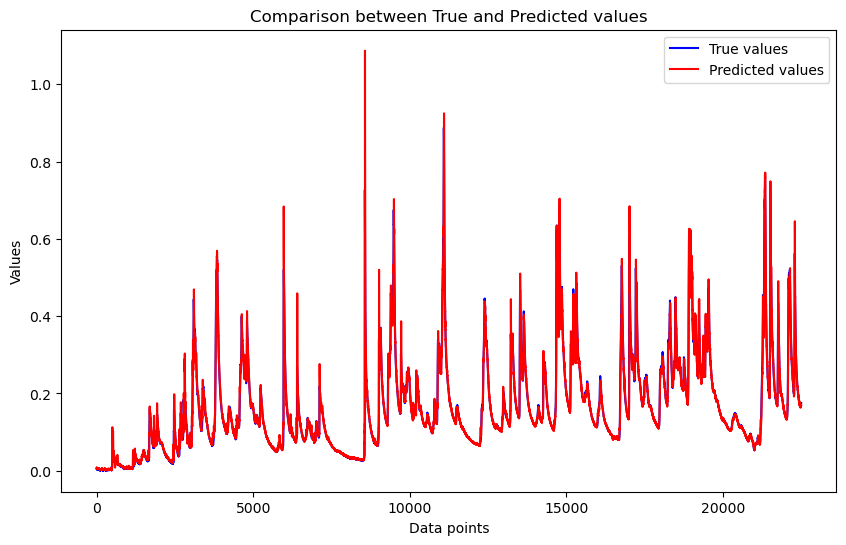

In [88]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_tuned_ridge_Halt_96in_8out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [89]:
def nse(y_test, pred_tuned_ridge_Halt_96in_8out):
    numerator = np.sum((y_test - pred_tuned_ridge_Halt_96in_8out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_tuned_ridge_Halt_96in_8out)
mae = mean_absolute_error(y_test, pred_tuned_ridge_Halt_96in_8out)
nse_value = nse(y_test, pred_tuned_ridge_Halt_96in_8out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.0005039491385328092
MAE: 0.007943277088023736
NSE: 0.9655257258969693


In [90]:
from joblib import dump
dump(Ridge_Halt_96in_8out, 'Ridge_Halt_96in_8out.joblib')

['Ridge_Halt_96in_8out.joblib']

In [91]:
dump(grid_Ridge_Halt_96in_48out, 'grid_Ridge_Halt_96in_48out.joblib')

['grid_Ridge_Halt_96in_48out.joblib']

In [92]:
dump(Ridge_Halt_96in_48out, 'Ridge_Halt_96in_48out.joblib')

['Ridge_Halt_96in_48out.joblib']

In [93]:
dump(grid_Ridge_Halt_96in_32out, 'grid_Ridge_Halt_96in_32out.joblib')

['grid_Ridge_Halt_96in_32out.joblib']

In [94]:
dump(Ridge_Halt_96in_32out, 'Ridge_Halt_96in_32out.joblib')

['Ridge_Halt_96in_32out.joblib']

In [95]:
dump(grid_Ridge_Halt_96in_16out, 'grid_Ridge_Halt_96in_16out.joblib')

['grid_Ridge_Halt_96in_16out.joblib']

In [96]:
dump(Ridge_Halt_96in_16out, 'Ridge_Halt_96in_16out.joblib')

['Ridge_Halt_96in_16out.joblib']

In [97]:
dump(grid_Ridge_Halt_96in_8out, 'grid_Ridge_Halt_96in_8out.joblib')

['grid_Ridge_Halt_96in_8out.joblib']